# Pyaro and PyAerocom 

In [1]:
import pyaerocom as pya
import matplotlib.pyplot as plt

Checking access to: /lustre/storeB/project
Checking access to: /lustre/storeB/project/aerocom
Checking access to: /lustre/storeB/project/aerocom/aerocom1


/home/danielh/miniconda3/envs/pya/lib/python3.11/site-packages/geonum/__init__.py:26: UserWarning: Plotting of maps etc. is deactivated, please install Basemap
  warn('Plotting of maps etc. is deactivated, please install Basemap')


## PyaroConfig

Pyaro can be used with PyAerocom through the class called **PyaroConfig**. This can be thought of as a dictionary that enforeces you to give the correct inputs. We start by finding the available engines with pyaro

In [2]:
import pyaro

pyaro.list_timeseries_engines()

{'aeronetsdareader': <pyaro_readers.aeronetsdareader.AeronetSdaTimeseriesReader.AeronetSdaTimeseriesEngine at 0x7f60204ec450>,
 'aeronetsunreader': <pyaro_readers.aeronetsunreader.AeronetSunTimeseriesReader.AeronetSunTimeseriesEngine at 0x7f60209d3ad0>,
 'csv_timeseries': <pyaro.csvreader.CSVTimeseriesReader.CSVTimeseriesEngine at 0x7f6020705dd0>}

We want to read aeronetsun data. We can now make the config with PyaroConfig

In [3]:
from pyaerocom.io.pyaro.pyaro_config import PyaroConfig

data_id = "aeronetsunreader"
url = "https://pyaerocom.met.no/pyaro-suppl/testdata/aeronetsun_testdata.csv"
filters = {"variables": {"include": ["AOD_550nm"]}}
name_map = {"AOD_550nm": "od550aer"}


config = PyaroConfig(
    data_id=data_id,
    filename_or_obj_or_url=url,
    filters=filters,
    name_map=name_map,
)

The config contains four fields:

1. data_id: The name of the reader/data. This name must be one of the names allowed by Pyaro
2. filename_or_obj_or_url: The path to the dataset, that being a path or an url
3. filters: Dictionary of filters
4. name_map: A dictionary which gives new names to variables found in the data set. On the form ```{old_name: new_name}```

## Filters

Filters are objects that can be used to read a subset of data. In the above example we've used a filter to filter out all variables that are not AOD 550nm. Different engines have different filters, so to find out which filters are available use

In [4]:
engine = pyaro.list_timeseries_engines()[data_id] # Finds the engine associated with aeronetsunreader
engine.supported_filters()

[VariableNameFilter(**{'reader_to_new': {}, 'include': [], 'exclude': []}),
 StationFilter(**{'include': [], 'exclude': []}),
 CountryFilter(**{'include': [], 'exclude': []}),
 BoundingBoxFilter(**{'include': [], 'exclude': []}),
 TimeBoundsFilter(**{'start_include': [], 'start_exclude': [], 'startend_include': [], 'startend_exclude': [], 'end_include': [], 'end_exclude': []}),
 FlagFilter(**{'include': [], 'exclude': []})]

Here is a list of the available filters. The name of the filter, is given as the first part of the names in the list above. The filters are written as dictionaries, with the name as the key and another dictionary as the value. There we define how the filter is used. In our case ```"variables```and ```{include: ["AOD_550nm"]}```.

## Passing the config to PyAerocom

We can now pass this config into ```ReadUngridded```to read the data. For this we use the new argument ```config```

In [5]:
rp = pya.io.ReadUngridded(config=config)

data = rp.read(vars_to_retrieve=["od550aer"])

100%|████████████████████████████████████| 9993/9993 [00:00<00:00, 34798.90it/s]


<class 'pyaerocom.io.read_aeronet_invv3.ReadAeronetInvV3'> ['AeronetInvV3Lev2.daily', 'AeronetInvV3Lev1.5.daily']
<class 'pyaerocom.io.read_aeronet_invv2.ReadAeronetInvV2'> ['AeronetInvV2Lev2.daily', 'AeronetInvV2Lev1.5.daily']
<class 'pyaerocom.io.read_aeronet_sdav2.ReadAeronetSdaV2'> ['AeronetSDAV2Lev2.daily']
<class 'pyaerocom.io.read_aeronet_sdav3.ReadAeronetSdaV3'> ['AeronetSDAV3Lev1.5.daily', 'AeronetSDAV3Lev2.daily']
<class 'pyaerocom.io.read_aeronet_sunv2.ReadAeronetSunV2'> ['AeronetSunV2Lev2.daily', 'AeronetSunV2Lev2.AP']
<class 'pyaerocom.io.read_aeronet_sunv3.ReadAeronetSunV3'> ['AeronetSunV3Lev1.5.daily', 'AeronetSunV3Lev1.5.AP', 'AeronetSunV3Lev2.daily', 'AeronetSunV3Lev2.AP']
<class 'pyaerocom.io.read_earlinet.ReadEarlinet'> ['EARLINET']
<class 'pyaerocom.io.read_ebas.ReadEbas'> ['EBASMC']
<class 'pyaerocom.io.read_aasetal.ReadAasEtal'> ['GAWTADsubsetAasEtAl']
<class 'pyaerocom.io.read_airnow.ReadAirNow'> ['AirNow']
<class 'pyaerocom.io.read_eea_aqerep.ReadEEAAQEREP'> ['E

We can now look at the data for a station

Input time frequency daily equals current frequency of data. Resampling will be applied anyways which will introduce NaN values at missing time stamps


<Axes: title={'center': 'Alta_Floresta'}, ylabel='od550aer'>

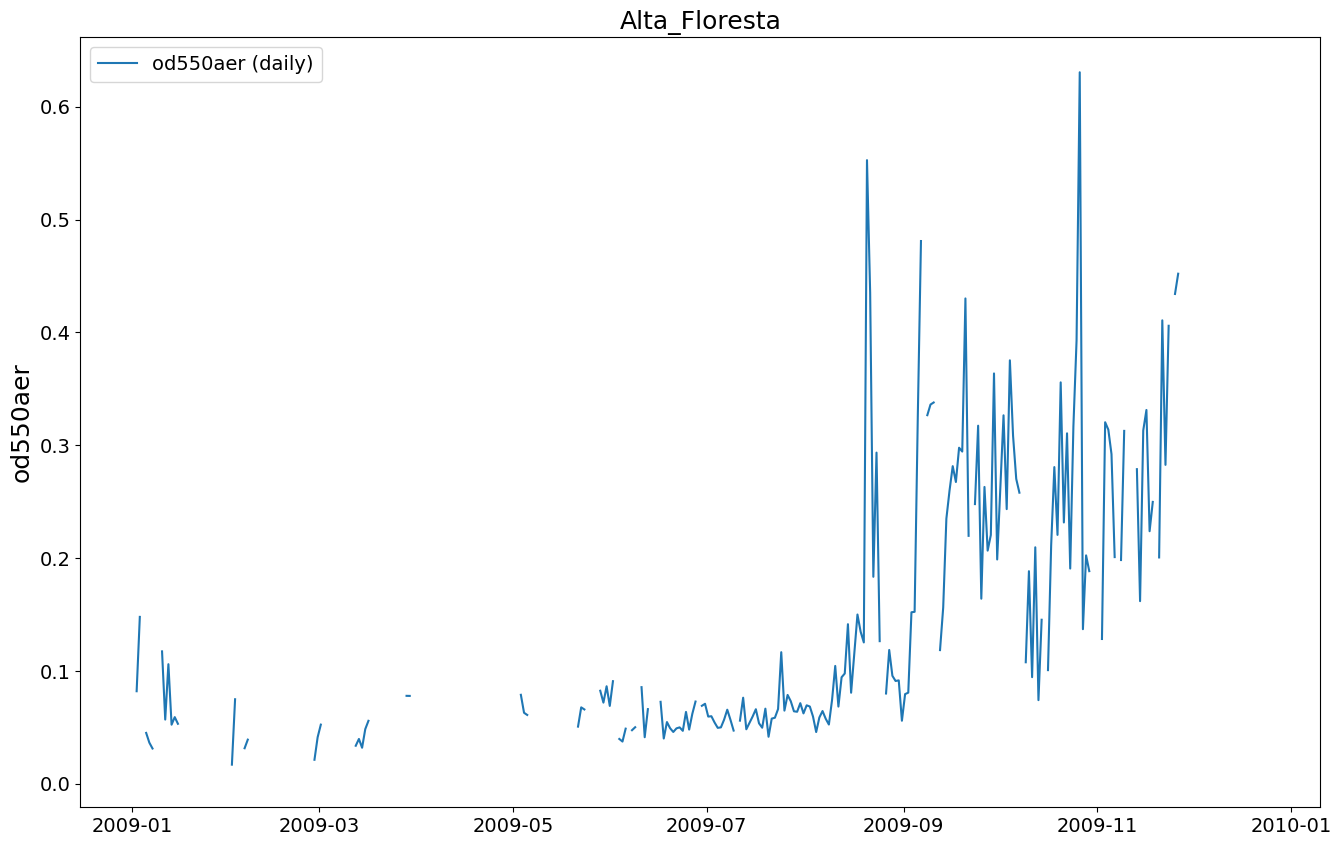

In [6]:
data.plot_station_timeseries(1, "od550aer", start=2009)

## Colocation
We can now move on to colocation. For this we need some model data. We can use Aerocom data

In [7]:
model_id = "AEROCOM-MEAN-2x3_AP3-CTRL"
model_name = "AEROCOM_MEAN"

Now we can pass this, and our config into the Colocator. Now the config needs to be passed as the argument ```obs_config```

In [8]:
col = pya.Colocator(
    model_id=model_id,
    obs_config=config,
    obs_vars="od550aer",
    ts_type="monthly",
    model_ts_type_read="monthly",
    model_name=model_name,
)

col.run()

<class 'pyaerocom.io.read_aeronet_invv3.ReadAeronetInvV3'> ['AeronetInvV3Lev2.daily', 'AeronetInvV3Lev1.5.daily']
<class 'pyaerocom.io.read_aeronet_invv2.ReadAeronetInvV2'> ['AeronetInvV2Lev2.daily', 'AeronetInvV2Lev1.5.daily']
<class 'pyaerocom.io.read_aeronet_sdav2.ReadAeronetSdaV2'> ['AeronetSDAV2Lev2.daily']
<class 'pyaerocom.io.read_aeronet_sdav3.ReadAeronetSdaV3'> ['AeronetSDAV3Lev1.5.daily', 'AeronetSDAV3Lev2.daily']
<class 'pyaerocom.io.read_aeronet_sunv2.ReadAeronetSunV2'> ['AeronetSunV2Lev2.daily', 'AeronetSunV2Lev2.AP']
<class 'pyaerocom.io.read_aeronet_sunv3.ReadAeronetSunV3'> ['AeronetSunV3Lev1.5.daily', 'AeronetSunV3Lev1.5.AP', 'AeronetSunV3Lev2.daily', 'AeronetSunV3Lev2.AP']
<class 'pyaerocom.io.read_earlinet.ReadEarlinet'> ['EARLINET']
<class 'pyaerocom.io.read_ebas.ReadEbas'> ['EBASMC']
<class 'pyaerocom.io.read_aasetal.ReadAasEtal'> ['GAWTADsubsetAasEtAl']
<class 'pyaerocom.io.read_airnow.ReadAirNow'> ['AirNow']
<class 'pyaerocom.io.read_eea_aqerep.ReadEEAAQEREP'> ['E

100%|████████████████████████████████████| 9993/9993 [00:00<00:00, 47789.66it/s]

<class 'pyaerocom.io.read_aeronet_invv3.ReadAeronetInvV3'> ['AeronetInvV3Lev2.daily', 'AeronetInvV3Lev1.5.daily']
<class 'pyaerocom.io.read_aeronet_invv2.ReadAeronetInvV2'> ['AeronetInvV2Lev2.daily', 'AeronetInvV2Lev1.5.daily']
<class 'pyaerocom.io.read_aeronet_sdav2.ReadAeronetSdaV2'> ['AeronetSDAV2Lev2.daily']
<class 'pyaerocom.io.read_aeronet_sdav3.ReadAeronetSdaV3'> ['AeronetSDAV3Lev1.5.daily', 'AeronetSDAV3Lev2.daily']
<class 'pyaerocom.io.read_aeronet_sunv2.ReadAeronetSunV2'> ['AeronetSunV2Lev2.daily', 'AeronetSunV2Lev2.AP']
<class 'pyaerocom.io.read_aeronet_sunv3.ReadAeronetSunV3'> ['AeronetSunV3Lev1.5.daily', 'AeronetSunV3Lev1.5.AP', 'AeronetSunV3Lev2.daily', 'AeronetSunV3Lev2.AP']
<class 'pyaerocom.io.read_earlinet.ReadEarlinet'> ['EARLINET']
<class 'pyaerocom.io.read_ebas.ReadEbas'> ['EBASMC']
<class 'pyaerocom.io.read_aasetal.ReadAasEtal'> ['GAWTADsubsetAasEtAl']
<class 'pyaerocom.io.read_airnow.ReadAirNow'> ['AirNow']
<class 'pyaerocom.io.read_eea_aqerep.ReadEEAAQEREP'> ['E

/lustre/storeB/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III-2019/AEROCOM-MEAN-2x3_AP3-CTRL has subdir renamed. Using that one
Found match for ID AEROCOM-MEAN-2x3_AP3-CTRL
Meteorology config substring in data_id MEAN-2x3 needs to start with met.
Meteorology config substring in data_id MEAN-2x3 needs to start with met.
Meteorology config substring in data_id MEAN-2x3 needs to start with met.
Meteorology config substring in data_id MEAN-2x3 needs to start with met.
Meteorology config substring in data_id MEAN-2x3 needs to start with met.
Meteorology config substring in data_id MEAN-2x3 needs to start with met.
Meteorology config substring in data_id MEAN-2x3 needs to start with met.
Meteorology config substring in data_id MEAN-2x3 needs to start with met.
Meteorology config substring in data_id MEAN-2x3 needs to start with met.
Meteorology config substring in data_id MEAN-2x3 needs to start with met.
Meteorology config substring in data_id MEAN-2x3 needs to start with met.
Met

{'od550aer': {'od550aer': pyaerocom.ColocatedData: data: <xarray.DataArray 'od550aer' (data_source: 2, time: 12, station_name: 2)>
  array([[[0.10352023, 0.03902594],
          [0.12133368, 0.06929725],
          [0.05860459, 0.09757444],
          [0.08603477,        nan],
          [0.0838792 ,        nan],
          [       nan,        nan],
          [       nan, 0.11134255],
          [1.04779657, 0.04434151],
          [1.28173338, 0.05913538],
          [0.49343804, 0.04293068],
          [0.19978076, 0.02446057],
          [0.16508896, 0.0554687 ]],
  
         [[0.07018041, 0.04110068],
          [0.06417298, 0.06631772],
          [0.0651281 , 0.06129938],
          [0.07052724, 0.06702135],
          [0.09388953, 0.06159478],
          [0.09309519, 0.06192226],
          [0.19007444, 0.10699583],
          [0.80961418, 0.08990368],
          [0.78322548, 0.05577568],
          [0.30896598, 0.05242291],
          [0.10184403, 0.02809396],
          [0.08933712, 0.02757543]]])

And again we plot the result

<Axes: title={'center': 'Jan 2010-Dec 2010 (monthly)'}, xlabel='aeronetsunreader', ylabel='AEROCOM-MEAN-2x3_AP3-CTRL'>

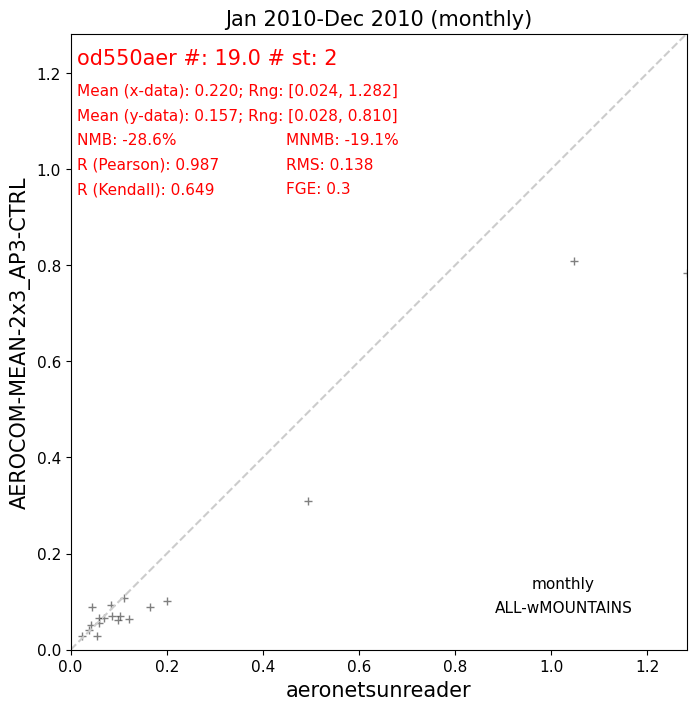

In [9]:
col.data["od550aer"]["od550aer"].plot_scatter()


## Pyaro and Aeroval

Aeroval works more or less in the same way as the examples above, the only change is that the config is passed as an argument when defining the observation

In [10]:
OBS_GROUNDBASED = {
    ################
    #    Pyaro
    ################
    "Pyaro-m": dict(
        obs_id=config.data_id,
        config=config,
        web_interface_name="Pyaro-d",
        obs_vars=["od550aer"],
        obs_vert_type="Column",
        ts_type="monthly",
    ),
}

Other that that, aeroval works in the same way as before. One thing to notice is that the ```obs_id``` must be identical to the data_id!

## Configuration Catalogs

Configs can become large and complicated. Thus we don't want to have to rewrite these config each time. We have intruduced a catalog system to save configurations. This is done in using YAML files.

The plan is to have one default catalog that is distributed with pyaerocom, which holds the most used configurations, and the option to have personal catalogs which the user can make themselves.

The default catalog is found in the data folder of pyaerocom

In [11]:
PyaroConfig._DEFAULT_CATALOG

PosixPath('/home/danielh/Documents/pyaerocom/pyaerocom/pyaerocom/data/pyaro_catalogs/default.yaml')

And looks like this

The ```PyaroConfig``` class comes with methods to look at the available configs. This method can take the path to a personal catalog. When no path is used, only the default catalog will be used

In [12]:
PyaroConfig.list_configs()

['aeronetsun_test', 'aeronetsun_od550aer']

From this list we can load a config. As with the list function, you need to add the path to the personal catalog if you want to use it

In [13]:
config = PyaroConfig.load("aeronetsun_od550aer")
config

PyaroConfig(data_id='aeronetsunreader', filename_or_obj_or_url='https://pyaerocom.met.no/pyaro-suppl/testdata/aeronetsun_testdata.csv', filters={'variables': {'include': ['AOD_550nm']}}, name_map={'AOD_550nm': 'od550aer'})

If you want to save the current config, use can use the ```save``` method together with a unique name for the config. This name needs to be unique!

You can add a path to where you want to save the catalog. If no path is given, the current working directory is used

In [14]:
config.save("aeronetsun_personal")

In [15]:
from pathlib import Path

PyaroConfig.list_configs(Path("./catalog.yaml"))

Updating with private catalog catalog.yaml


['aeronetsun_test', 'aeronetsun_od550aer', 'aeronetsun_personal']